In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset into a pandas dataframe
df = pd.read_csv('restaurant_reviews.csv')

In [3]:
# Printing the first 5 rows of the dataframe
print(df.head())

             date     rating    res_id   res_name  \
0  17/03/19 22:18  Rated 5.0  18716525  Aura Cafe   
1  16/03/19 21:25  Rated 3.0  18716525  Aura Cafe   
2  16/03/19 10:18  Rated 4.0  18716525  Aura Cafe   
3   14/03/19 9:13  Rated 5.0  18716525  Aura Cafe   
4   12/03/19 4:56  Rated 4.0  18716525  Aura Cafe   

                     rev_count    rev_id        rev_name  \
0  153 Reviews , 250 Followers   1226687   Hussain Abbas   
1    33 Reviews , 86 Followers  27912218  Sunakshi Gupta   
2   41 Reviews , 200 Followers  38270346  Bhavya Thamban   
3   49 Reviews , 500 Followers  39225454   Lovely Sharma   
4   32 Reviews , 345 Followers    740280  Srayana Sanyal   

                                                text  
0  RATED  Aura has to be my Beautiful Breakfast p...  
1  RATED  A decent place to come over for chit ch...  
2  RATED  Everything is good about this place exc...  
3  RATED  Aura Cafe has a good ambiance with outd...  
4  RATED  Aura Cafe is the perfect place for 

In [4]:
# Getting a summary of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1079 non-null   object
 1   rating     1079 non-null   object
 2   res_id     1079 non-null   int64 
 3   res_name   1079 non-null   object
 4   rev_count  1079 non-null   object
 5   rev_id     1079 non-null   int64 
 6   rev_name   1079 non-null   object
 7   text       1079 non-null   object
dtypes: int64(2), object(6)
memory usage: 67.6+ KB
None


In [5]:
# Describing the numerical columns of the dataframe
print(df.describe())

             res_id        rev_id
count  1.079000e+03  1.079000e+03
mean   1.432333e+07  2.353338e+07
std    7.798584e+06  1.977927e+07
min    9.102600e+04  7.372000e+03
25%    1.824128e+07  2.115246e+06
50%    1.853874e+07  2.956250e+07
75%    1.871314e+07  3.805740e+07
max    1.892751e+07  9.200588e+07


In [6]:
# Checking for any missing values in the dataframe
print(df.isnull().sum())

date         0
rating       0
res_id       0
res_name     0
rev_count    0
rev_id       0
rev_name     0
text         0
dtype: int64


In [7]:
df.columns

Index(['date', 'rating', 'res_id', 'res_name', 'rev_count', 'rev_id',
       'rev_name', 'text'],
      dtype='object')

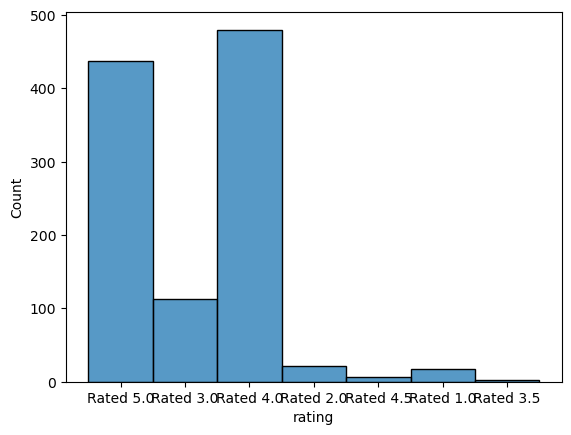

In [8]:
# Check the distribution of ratings using a histogram
sns.histplot(data=df, x='rating', bins=10)
plt.show()

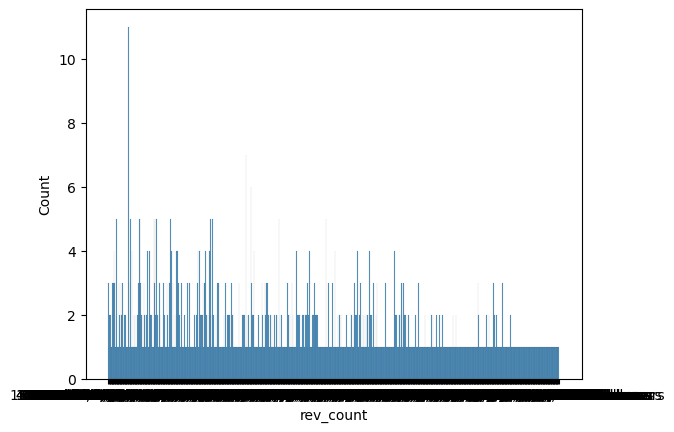

In [9]:
# Check the distribution of review counts using a histogram
sns.histplot(data=df, x='rev_count', bins=10)
plt.show()

In [10]:
# Check the top 10 restaurants by number of reviews
top_restaurants = df.groupby('res_name')['rev_id'].count().sort_values(ascending=False).head(10)
print(top_restaurants)

res_name
The Roastery Coffee House     74
eat.fit                       62
Lé Vantage Cafe Bar           59
Over The Moon Brew Company    53
Dhaba Estd 1986 Delhi         51
The Fisherman's Wharf         49
Zero40 Brewing                48
Truffle Tower                 48
Nimrah Cafe And Bakery        47
Fat Pigeon - Bar Hop          45
Name: rev_id, dtype: int64


### Text document representation using Bag of Words analysis

In [11]:
# Importing the necessary libraries
from sklearn.feature_extraction.text import CountVectorizer

# Creating a bag of words representation of the reviews
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
print(X.shape)
print(vectorizer.get_feature_names_out())

(1079, 6123)
['00' '00pm' '07' ... 'zones' 'zucchini' 'zuchini']


### Sentiment Analysis using Text Classifier

count    1079.000000
mean      408.460612
std       206.127773
min       147.000000
25%       246.000000
50%       360.000000
75%       531.500000
max      1003.000000
Name: text_len, dtype: float64


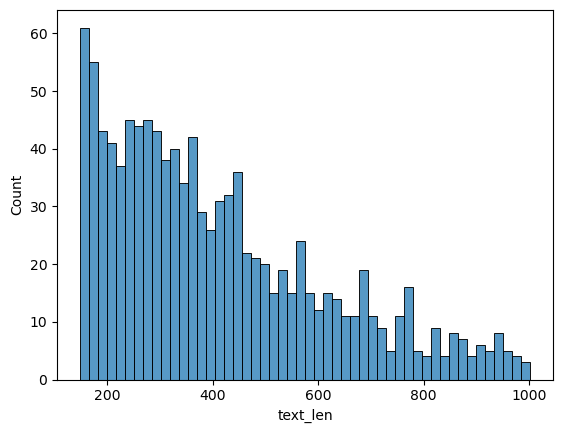

[('the', 3073), ('and', 2736), ('a', 1809), ('is', 1540), ('to', 1493), ('was', 1345), ('of', 1211), ('RATED', 1079), ('place', 990), ('I', 921)]


In [12]:
# Check the length of the reviews
df['text_len'] = df['text'].apply(len)
print(df['text_len'].describe())

# Check the distribution of review lengths using a histogram
sns.histplot(data=df, x='text_len', bins=50)
plt.show()

# Check the most common words in the reviews
from collections import Counter
word_counts = Counter(" ".join(df['text']).split())
print(word_counts.most_common(10))

In [15]:
# Importing the necessary libraries
from sklearn.feature_extraction.text import CountVectorizer

# Creating a bag of words representation of the reviews
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
print(X.shape)
print(vectorizer.get_feature_names_out())

(1079, 6123)
['00' '00pm' '07' ... 'zones' 'zucchini' 'zuchini']


count    1079.000000
mean      408.460612
std       206.127773
min       147.000000
25%       246.000000
50%       360.000000
75%       531.500000
max      1003.000000
Name: text_len, dtype: float64


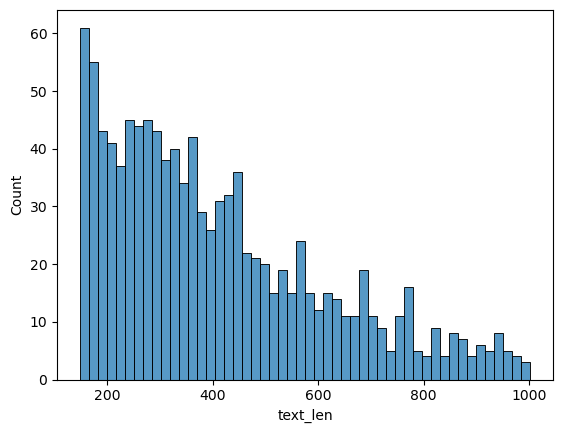

[('the', 3073), ('and', 2736), ('a', 1809), ('is', 1540), ('to', 1493), ('was', 1345), ('of', 1211), ('RATED', 1079), ('place', 990), ('I', 921)]


In [19]:
# Check the length of the reviews
df['text_len'] = df['text'].apply(len)
print(df['text_len'].describe())

# Check the distribution of review lengths using a histogram
sns.histplot(data=df, x='text_len', bins=50)
plt.show()

# Check the most common words in the reviews
from collections import Counter
word_counts = Counter(" ".join(df['text']).split())
print(word_counts.most_common(10))

In [22]:
# Importing the necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['rev_count'], random_state=42)

In [23]:
# Creating a bag of words representation of the reviews
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

# Fitting a Naive Bayes model on the training data
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# Creating a bag of words representation of the test data
X_test_vec = vectorizer.transform(X_test)

# Predicting the sentiment of the test data
y_pred = nb.predict(X_test_vec)

# Printing the classification report of the Naive Bayes model
print(classification_report(y_test, y_pred))

                              precision    recall  f1-score   support

100 Reviews , 2216 Followers       0.00      0.00      0.00       1.0
 102 Reviews , 339 Followers       0.00      0.00      0.00       1.0
106 Reviews , 1078 Followers       0.00      0.00      0.00       1.0
107 Reviews , 1139 Followers       0.00      0.00      0.00       2.0
 108 Reviews , 553 Followers       0.00      0.00      0.00       1.0
 111 Reviews , 313 Followers       0.00      0.00      0.00       1.0
 111 Reviews , 944 Followers       0.00      0.00      0.00       0.0
 114 Reviews , 766 Followers       0.00      0.00      0.00       1.0
 115 Reviews , 247 Followers       0.00      0.00      0.00       1.0
 115 Reviews , 305 Followers       0.00      0.00      0.00       1.0
116 Reviews , 2023 Followers       0.00      0.00      0.00       1.0
117 Reviews , 4731 Followers       0.00      0.00      0.00       1.0
120 Reviews , 2120 Followers       0.00      0.00      0.00       1.0
 120 Reviews , 490 

C:\Users\Shobhandeb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shobhandeb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shobhandeb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shobhandeb\anaconda3\lib\site-packages\